Analyse des données

Préparation des données avec pandas


In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import polars as pl
import pandas as pd
pd.set_option('display.float_format', lambda x: f'{x :.2f}')
from cleaner import DataCleaner
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from tools import (
    logging,
    bins_generator,
    import_datasets
)

In [2]:
df_og = import_datasets("big_dataframe/movies.csv", types="pandas", sep=",")
cleaning = DataCleaner()
df1 = cleaning.fix_values(df_og, "fix_n")
df = cleaning.fix_values(df1, "fix_encode")
logging.info(f"Cleaned : {len(df_og) - len(df)} rows")

"""
Nettoyage des date_sorties nan et modification de la colonne.
Nous avons plusieurs methodes disponible, comme:

df['titre_date_sortie'].fillna(-1, inplace=True)
df.dropna(subset=['titre_date_sortie'], inplace=True)
et une fois que l'on a clean
on applique int a toute la colonne
df['titre_date_sortie'] = df['titre_date_sortie'].astype(int)

"""
df
df['titre_date_sortie'].fillna(0, inplace=True)
df['titre_date_sortie'] = df['titre_date_sortie'].astype("int64")
# df['person_birthdate'] = df['person_birthdate'].astype("int64")
df['titre_duree'] = df['titre_duree'].astype("int64")

2023-10-25 16:54:17 INFO     Pandas loaded ! Importing movies.csv...
2023-10-25 16:54:18 INFO     Fixing N values...
2023-10-25 16:54:18 INFO     Fixing encoding values...
2023-10-25 16:54:19 INFO     Cleaned : 0 rows


In [3]:
df_test = df.copy()
df_test["titre_genres"] = df_test["titre_genres"].str.split(",")
genre_mode = df_test['titre_genres'].explode()
genre_mode.mode()

0    Drama
Name: titre_genres, dtype: object

In [4]:
year_n = datetime.now().year

# bins, names = bins_generator(df_test["titre_date_sortie"].max())
bins, names = bins_generator(year_n)

df_test["cuts"] = pd.cut(
    df_test["titre_date_sortie"],
    bins=bins,
    labels=names
)

In [54]:
from colored import attr, fg

def color(text, color=None, hex=""):
    if color == 'red':
        return f"{fg(1)}{text}{attr(0)}"
    elif color == 'green':
        return f"{fg(2)}{text}{attr(0)}"
    elif color == 'yellow':
        return f"{fg(3)}{text}{attr(0)}"
    elif color == 'blue':
        return f"{fg(4)}{text}{attr(0)}"
    elif color == 'else':
        return f"{fg(hex)}{text}{attr(0)}"
    else:
        return text

test = "Dans ton cul ! 🍆"

In [67]:
print(color(test, "else", hex="#ffa6c9"))

p = f"{fg('#ffa6c9')}{test}{attr(0)}"
print(p)

Dans ton cul ! 🍆
Dans ton cul ! 🍆


C:\Users\morga\AppData\Local\Temp\ipykernel_25700\3931130687.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_films = df_test.groupby("cuts").size().reset_index(name="total_films")


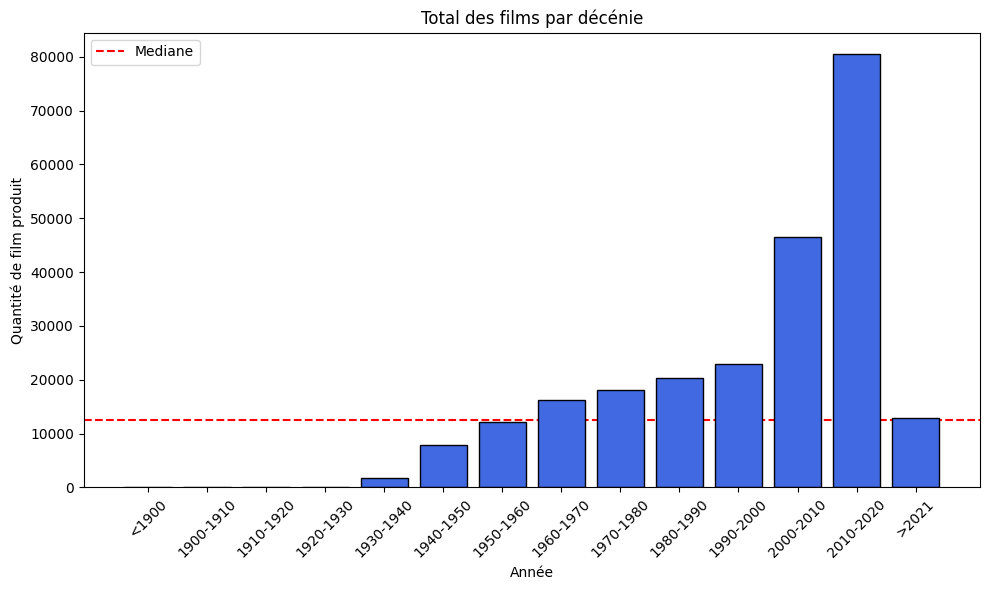

In [43]:
total_films = df_test.groupby("cuts").size().reset_index(name="total_films")
x = total_films["cuts"]
y = total_films["total_films"]

plt.figure(figsize=(10, 6))
bars = plt.bar(
    x,
    y,
    color='royalblue',
    edgecolor="black"
)
plt.title('Total des films par décénie')
plt.ylabel('Quantité de film produit')
plt.xlabel('Année')
plt.axhline(y=total_films["total_films"].median(), color="red", linestyle="--", label="Mediane", zorder=0)
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [7]:
# Nettoyage des furée de films en dessous d'une heure et de 4 heures.
condi =(
    ((df_test["titre_duree"] < 60) | (df_test["titre_duree"] > 240))
)
df_test = df_test[~condi].reset_index(drop='index')

condi =(
    df_test["titre_date_sortie"] < 1940
)
df_test = df_test[~condi].reset_index(drop='index')
df_test

,titre_id,titre_str,titre_date_sortie,titre_duree,titre_genres,rating_avg,rating_votes,cuts
0,tt0013274,Istoriya grazhdanskoy voyny,2021,94,[Documentary],6.80,58,2010-2020
1,tt0015414,La tierra de los toros,2000,60,NaN,5.20,16,1990-2000
2,tt0015724,Dama de noche,1993,102,"[Drama, Mystery, Romance]",6.10,26,1990-2000
3,tt0018867,Escape from Hong Kong,1942,60,"[Adventure, Mystery, War]",5.50,38,1940-1950
4,tt0022064,Lebbra bianca,1951,100,[Drama],5.30,56,1940-1950
...,...,...,...,...,...,...,...,...
239289,tt9916190,Safeguard,2020,95,"[Action, Adventure, Thriller]",3.70,244,2010-2020
239290,tt9916270,Il talento del calabrone,2020,84,[Thriller],5.80,1446,2010-2020
239291,tt9916362,Coven,2020,92,"[Drama, History]",6.40,5571,2010-2020
239292,tt9916538,Kuambil Lagi Hatiku,2019,123,[Drama],8.60,7,2010-2020


In [8]:
line = "tmdb_full.csv"
df_imdb = pd.read_csv(line)

C:\Users\morga\AppData\Local\Temp\ipykernel_25700\1484105765.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_imdb = pd.read_csv(line)


In [9]:
len(df_imdb)

309572

In [10]:

merged = pd.merge(
    df_test,
    df_imdb,
    left_on="titre_id",
    right_on="imdb_id",
    how="left"
)


logging.info(f"Cleaned : {len(df_test) - len(merged)} rows")


2023-10-25 16:54:24 INFO     Cleaned : 0 rows


In [11]:
print(merged.head(10).to_markdown())

|    | titre_id   | titre_str                         |   titre_date_sortie |   titre_duree | titre_genres                    |   rating_avg |   rating_votes | cuts      |   adult | backdrop_path                    |   budget | genres                                      | homepage                                                                                                 |     id | imdb_id   | original_language   | original_title        | overview                                                                                                                                                                                                                                                                                                                                                      |   popularity | poster_path                      | production_countries   | release_date   |     revenue |   runtime | spoken_languages   | status   | tagline                                           

In [12]:
# status
# popularity
# revenue

drop = [
    "adult",
    "backdrop_path",
    "budget",
    "genres",
    "homepage",
    "id",
    "imdb_id",
    "original_title",
    "overview",
    "poster_path",
    "release_date",
    "runtime",
    "tagline",
    "title",
    "video",
    "vote_average",
    "vote_count",
    "production_companies_name",
    "production_companies_country"
]

t = merged.drop(drop, axis=1)
t.isna().sum()

titre_id                    0
titre_str                   0
titre_date_sortie           0
titre_duree                 0
titre_genres             4887
rating_avg                  0
rating_votes                0
cuts                        0
original_language       74646
popularity              74646
production_countries    74646
revenue                 74646
spoken_languages        74646
status                  74646
dtype: int64

In [13]:
print(len(t))
df = t.dropna()

df = df[df["rating_avg"] > df["rating_avg"].median()]
print(len(df))
df

239294
80898


,titre_id,titre_str,titre_date_sortie,titre_duree,titre_genres,rating_avg,rating_votes,cuts,original_language,popularity,production_countries,revenue,spoken_languages,status
9,tt0029284,My Favorite Wife,1940,88,"[Comedy, Romance]",7.30,11204,1930-1940,en,7.35,['US'],2057000.00,['en'],Released
12,tt0029876,El fanfarrón: ¡Aquí llegó el valentón!,1940,83,"[Adventure, Drama, Western]",7.50,16,1930-1940,es,0.84,['MX'],0.00,['es'],Released
18,tt0031084,Beating Heart,1940,97,"[Comedy, Drama]",6.90,324,1930-1940,fr,0.99,['FR'],0.00,['fr'],Released
20,tt0031191,Outside the Three-Mile Limit,1940,64,"[Crime, Drama, Romance]",6.30,13,1930-1940,en,0.88,['US'],0.00,['en'],Released
22,tt0031217,Dead Man's Shoes,1940,70,[Drama],8.10,30,1930-1940,en,1.53,['GB'],0.00,['en'],Released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239283,tt9914942,Life Without Sara Amat,2019,74,[Drama],6.60,182,2010-2020,ca,3.27,['ES'],0.00,['ca'],Released
239284,tt9914972,Blind Ambition,2021,96,[Documentary],7.10,289,2010-2020,en,1.42,['AU'],124375.00,"['sn', 'fr', 'en']",Released
239285,tt9915790,Bobbyr Bondhura,2019,106,[Family],7.20,40,2010-2020,bn,0.60,['IN'],0.00,[],Released
239287,tt9915946,Nuestra película,1993,96,[Documentary],7.00,10,1990-2000,es,1.15,[],0.00,['es'],Released


In [14]:
def decode_clean(
    serie: pd.Series
) -> str:
    return (
        serie.replace("[", "")
            .replace("]", "")
            .replace("'", "")
            .replace(" ", "")
        )

df1 = df.copy()

In [15]:
df1["spoken_languages"] = np.where(df1["spoken_languages"] == "[]", np.nan, df1["spoken_languages"])
print(len(df1))
df1 = df1.dropna()
print(len(df1))
df1

80898
73132


,titre_id,titre_str,titre_date_sortie,titre_duree,titre_genres,rating_avg,rating_votes,cuts,original_language,popularity,production_countries,revenue,spoken_languages,status
9,tt0029284,My Favorite Wife,1940,88,"[Comedy, Romance]",7.30,11204,1930-1940,en,7.35,['US'],2057000.00,['en'],Released
12,tt0029876,El fanfarrón: ¡Aquí llegó el valentón!,1940,83,"[Adventure, Drama, Western]",7.50,16,1930-1940,es,0.84,['MX'],0.00,['es'],Released
18,tt0031084,Beating Heart,1940,97,"[Comedy, Drama]",6.90,324,1930-1940,fr,0.99,['FR'],0.00,['fr'],Released
20,tt0031191,Outside the Three-Mile Limit,1940,64,"[Crime, Drama, Romance]",6.30,13,1930-1940,en,0.88,['US'],0.00,['en'],Released
22,tt0031217,Dead Man's Shoes,1940,70,[Drama],8.10,30,1930-1940,en,1.53,['GB'],0.00,['en'],Released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239282,tt9914644,9/11: Escape from the Towers,2018,120,[Documentary],8.30,138,2010-2020,en,1.56,['US'],0.00,['en'],Released
239283,tt9914942,Life Without Sara Amat,2019,74,[Drama],6.60,182,2010-2020,ca,3.27,['ES'],0.00,['ca'],Released
239284,tt9914972,Blind Ambition,2021,96,[Documentary],7.10,289,2010-2020,en,1.42,['AU'],124375.00,"['sn', 'fr', 'en']",Released
239287,tt9915946,Nuestra película,1993,96,[Documentary],7.00,10,1990-2000,es,1.15,[],0.00,['es'],Released


In [16]:
df1["production_countries"] = df1["production_countries"].apply(decode_clean).str.split()
df1["spoken_languages"] = df1["spoken_languages"].apply(decode_clean).str.split()

In [17]:
df1

,titre_id,titre_str,titre_date_sortie,titre_duree,titre_genres,rating_avg,rating_votes,cuts,original_language,popularity,production_countries,revenue,spoken_languages,status
9,tt0029284,My Favorite Wife,1940,88,"[Comedy, Romance]",7.30,11204,1930-1940,en,7.35,[US],2057000.00,[en],Released
12,tt0029876,El fanfarrón: ¡Aquí llegó el valentón!,1940,83,"[Adventure, Drama, Western]",7.50,16,1930-1940,es,0.84,[MX],0.00,[es],Released
18,tt0031084,Beating Heart,1940,97,"[Comedy, Drama]",6.90,324,1930-1940,fr,0.99,[FR],0.00,[fr],Released
20,tt0031191,Outside the Three-Mile Limit,1940,64,"[Crime, Drama, Romance]",6.30,13,1930-1940,en,0.88,[US],0.00,[en],Released
22,tt0031217,Dead Man's Shoes,1940,70,[Drama],8.10,30,1930-1940,en,1.53,[GB],0.00,[en],Released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239282,tt9914644,9/11: Escape from the Towers,2018,120,[Documentary],8.30,138,2010-2020,en,1.56,[US],0.00,[en],Released
239283,tt9914942,Life Without Sara Amat,2019,74,[Drama],6.60,182,2010-2020,ca,3.27,[ES],0.00,[ca],Released
239284,tt9914972,Blind Ambition,2021,96,[Documentary],7.10,289,2010-2020,en,1.42,[AU],124375.00,"[sn,fr,en]",Released
239287,tt9915946,Nuestra película,1993,96,[Documentary],7.00,10,1990-2000,es,1.15,[],0.00,[es],Released


In [18]:
df1[df1["titre_id"] == "tt9907782"]

,titre_id,titre_str,titre_date_sortie,titre_duree,titre_genres,rating_avg,rating_votes,cuts,original_language,popularity,production_countries,revenue,spoken_languages,status
239260,tt9907782,The Cursed,2021,111,"[Fantasy, Horror, Mystery]",6.20,14602,2010-2020,en,22.87,[US],4588389.00,[en],Released


In [19]:
akas = import_datasets("movies_datasets/title_akas.tsv", types="pandas", sep="\t")

2023-10-25 16:54:26 INFO     Pandas loaded ! Importing title_akas.tsv...
c:\Users\morga\OneDrive\AppData\Bureau\WildCodeSchool\z_project_2\tools.py:92: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(datas, sep=sep, encoding="iso-8859-1")


In [20]:
# condi = (
#     akas["region"] == 'FR'
# )

# akas = akas[condi]

In [21]:
region_only = akas[["titleId", "region"]]
akas[akas["titleId"] == "tt18260116"]

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
18042467,tt18260116,10,"The Pharaoh, the Savage, and the Princess",XWW,en,\N,informal literal English title,0
18042468,tt18260116,11,"Il faraone, il selvaggio e la principessa",IT,\N,imdbDisplay,\N,0
18042469,tt18260116,12,"The Black Pharaoh, the Savage and the Princess",GB,\N,imdbDisplay,\N,0
18042470,tt18260116,13,"El faraÃ³n, el salvaje y la princesa",CO,\N,imdbDisplay,\N,0
18042471,tt18260116,14,"Le pharaon, le sauvage et la princesse",FR,\N,imdbDisplay,\N,0
18042472,tt18260116,15,"Black Pharaoh, the Savage, and the Princess",XWW,en,\N,pre-release title,0
18042473,tt18260116,16,"Pharaon, le sauvage et la maÃ®tresse des roses",\N,\N,alternative,\N,0
18042474,tt18260116,17,å¤ã®çå­ã¨ï¼ã¤ã®è±,JP,ja,imdbDisplay,\N,0
18042475,tt18260116,18,La princesse des roses et le prince des beignets,FR,\N,\N,segment title,0
18042476,tt18260116,19,"Le Pharaon, Le Sauvage Et La Princesse",IL,en,imdbDisplay,\N,0


In [22]:
added_region = pd.merge(
    df1,
    region_only,
    left_on="titre_id",
    right_on="titleId"
)
added_region

,titre_id,titre_str,titre_date_sortie,titre_duree,titre_genres,rating_avg,rating_votes,cuts,original_language,popularity,production_countries,revenue,spoken_languages,status,titleId,region
0,tt0029284,My Favorite Wife,1940,88,"[Comedy, Romance]",7.30,11204,1930-1940,en,7.35,[US],2057000.00,[en],Released,tt0029284,FR
1,tt0029284,My Favorite Wife,1940,88,"[Comedy, Romance]",7.30,11204,1930-1940,en,7.35,[US],2057000.00,[en],Released,tt0029284,PL
2,tt0029284,My Favorite Wife,1940,88,"[Comedy, Romance]",7.30,11204,1930-1940,en,7.35,[US],2057000.00,[en],Released,tt0029284,HU
3,tt0029284,My Favorite Wife,1940,88,"[Comedy, Romance]",7.30,11204,1930-1940,en,7.35,[US],2057000.00,[en],Released,tt0029284,JP
4,tt0029284,My Favorite Wife,1940,88,"[Comedy, Romance]",7.30,11204,1930-1940,en,7.35,[US],2057000.00,[en],Released,tt0029284,ZA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910666,tt9916362,Coven,2020,92,"[Drama, History]",6.40,5571,2010-2020,eu,8.63,"[AR,ES,FR]",0.00,"[eu,es]",Released,tt9916362,XWW
910667,tt9916362,Coven,2020,92,"[Drama, History]",6.40,5571,2010-2020,eu,8.63,"[AR,ES,FR]",0.00,"[eu,es]",Released,tt9916362,PT
910668,tt9916362,Coven,2020,92,"[Drama, History]",6.40,5571,2010-2020,eu,8.63,"[AR,ES,FR]",0.00,"[eu,es]",Released,tt9916362,AU
910669,tt9916362,Coven,2020,92,"[Drama, History]",6.40,5571,2010-2020,eu,8.63,"[AR,ES,FR]",0.00,"[eu,es]",Released,tt9916362,HU


In [23]:
added_region.drop_duplicates(subset=["titre_id"], keep="first", inplace=True)

In [24]:
added_region[added_region["titre_id"] == "tt18260116"]

,titre_id,titre_str,titre_date_sortie,titre_duree,titre_genres,rating_avg,rating_votes,cuts,original_language,popularity,production_countries,revenue,spoken_languages,status,titleId,region
688551,tt18260116,"The Black Pharaoh, the Savage and the Princess",2022,83,"[Animation, Family]",6.50,168,>2021,fr,2.70,"[BE,FR]",0.00,[fr],Released,tt18260116,XWW


In [25]:
condi = (
    added_region["status"] == "Released"
)

added_region[condi]

,titre_id,titre_str,titre_date_sortie,titre_duree,titre_genres,rating_avg,rating_votes,cuts,original_language,popularity,production_countries,revenue,spoken_languages,status,titleId,region
0,tt0029284,My Favorite Wife,1940,88,"[Comedy, Romance]",7.30,11204,1930-1940,en,7.35,[US],2057000.00,[en],Released,tt0029284,FR
49,tt0029876,El fanfarrón: ¡Aquí llegó el valentón!,1940,83,"[Adventure, Drama, Western]",7.50,16,1930-1940,es,0.84,[MX],0.00,[es],Released,tt0029876,MX
52,tt0031084,Beating Heart,1940,97,"[Comedy, Drama]",6.90,324,1930-1940,fr,0.99,[FR],0.00,[fr],Released,tt0031084,XYU
71,tt0031191,Outside the Three-Mile Limit,1940,64,"[Crime, Drama, Romance]",6.30,13,1930-1940,en,0.88,[US],0.00,[en],Released,tt0031191,DK
79,tt0031217,Dead Man's Shoes,1940,70,[Drama],8.10,30,1930-1940,en,1.53,[GB],0.00,[en],Released,tt0031217,AU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910607,tt9914644,9/11: Escape from the Towers,2018,120,[Documentary],8.30,138,2010-2020,en,1.56,[US],0.00,[en],Released,tt9914644,\N
910610,tt9914942,Life Without Sara Amat,2019,74,[Drama],6.60,182,2010-2020,ca,3.27,[ES],0.00,[ca],Released,tt9914942,EG
910626,tt9914972,Blind Ambition,2021,96,[Documentary],7.10,289,2010-2020,en,1.42,[AU],124375.00,"[sn,fr,en]",Released,tt9914972,ZA
910644,tt9915946,Nuestra película,1993,96,[Documentary],7.00,10,1990-2000,es,1.15,[],0.00,[es],Released,tt9915946,\N


In [26]:
added_region.head(50)

,titre_id,titre_str,titre_date_sortie,titre_duree,titre_genres,rating_avg,rating_votes,cuts,original_language,popularity,production_countries,revenue,spoken_languages,status,titleId,region
0,tt0029284,My Favorite Wife,1940,88,"[Comedy, Romance]",7.30,11204,1930-1940,en,7.35,[US],2057000.00,[en],Released,tt0029284,FR
49,tt0029876,El fanfarrón: ¡Aquí llegó el valentón!,1940,83,"[Adventure, Drama, Western]",7.50,16,1930-1940,es,0.84,[MX],0.00,[es],Released,tt0029876,MX
52,tt0031084,Beating Heart,1940,97,"[Comedy, Drama]",6.90,324,1930-1940,fr,0.99,[FR],0.00,[fr],Released,tt0031084,XYU
71,tt0031191,Outside the Three-Mile Limit,1940,64,"[Crime, Drama, Romance]",6.30,13,1930-1940,en,0.88,[US],0.00,[en],Released,tt0031191,DK
79,tt0031217,Dead Man's Shoes,1940,70,[Drama],8.10,30,1930-1940,en,1.53,[GB],0.00,[en],Released,tt0031217,AU
83,tt0031228,Devil's Daughter,1946,105,[Drama],6.70,152,1940-1950,fr,1.01,[FR],0.00,[fr],Released,tt0031228,AR
94,tt0031271,In the Times of Don Porfirio,1940,160,"[Comedy, Drama, Musical]",7.50,63,1930-1940,es,1.86,[MX],0.00,[es],Released,tt0031271,MX
98,tt0031341,French Without Tears,1940,86,[Comedy],6.80,110,1930-1940,en,1.40,[GB],0.00,[en],Released,tt0031341,FR
110,tt0031359,Gaslight,1940,84,"[Mystery, Thriller]",7.30,5083,1930-1940,en,7.11,[GB],0.00,[en],Released,tt0031359,PL
132,tt0031378,Golden Gloves,1940,66,"[Crime, Drama, Sport]",6.40,62,1930-1940,en,0.84,[US],0.00,[en],Released,tt0031378,RO


In [27]:
# added_region[added_region["titre_str"].str.contains("Star W")]

In [28]:

condi = (
    df1["original_language"].isna()
)
p = df1[condi]

p


pp = df1.copy()
pp
genre_mode = pp['titre_genres'].explode()
genre_mode.mode()
# # p.to_csv("tttt.csv", index=False)

0    Drama
Name: titre_genres, dtype: object

In [29]:
# On filtre les films qui sont déja sortie au cinéma
year_now = datetime.now().year

condi = (
    (df["person_job"].str.contains("act")) &
    (df["titre_date_sortie"] <= year_now)
)
df = df[condi]
actor = df.copy()

"""
La moyenne d'age des acteurs a la date de sortie du film.
Nous calculons la mediane sur cette base.

other KPI, calcul la moyenne des ages en fonction de l'année

"""
# ajouter colonne age pour les personnes
actor["person_age"] = np.where(
    (actor["person_birthdate"] > 1800) &
    (actor["titre_date_sortie"] > 1800) &
    (actor["titre_date_sortie"] - actor["person_birthdate"] >= 0),
    (actor["titre_date_sortie"] - actor["person_birthdate"]),
    0
)
actor.tail()

KeyError: 'person_job'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1746766 entries, 0 to 4609235
Data columns (total 13 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   titre_id           object
 1   titre_str          object
 2   titre_type         object
 3   titre_date_sortie  int64 
 4   titre_date_fin     int64 
 5   titre_duree        int64 
 6   titre_genres       object
 7   person_id          object
 8   person_name        object
 9   person_birthdate   int64 
 10  person_job         object
 11  person_role        object
 12  person_index       int64 
dtypes: int64(5), object(8)
memory usage: 186.6+ MB


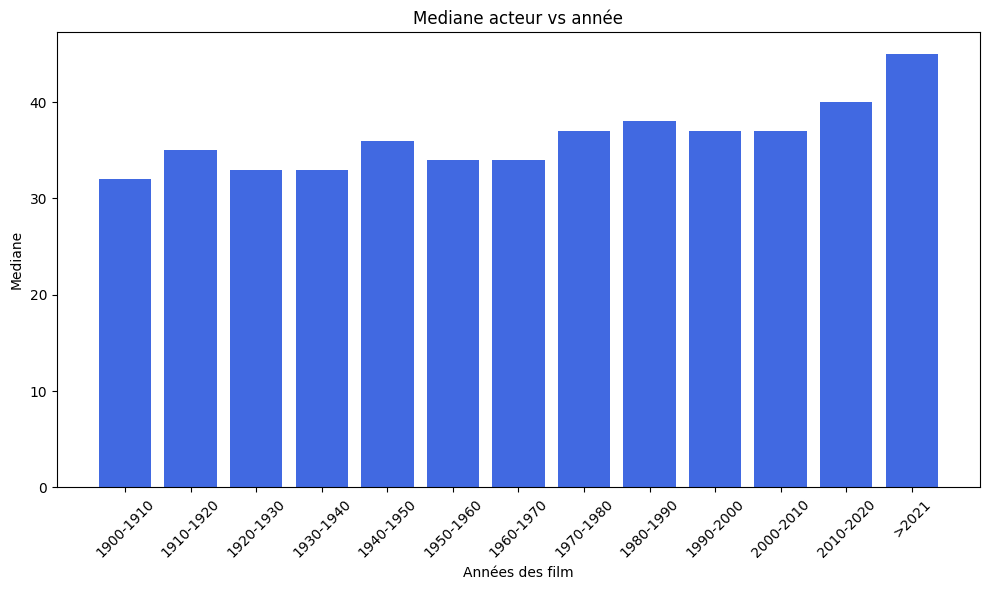

In [ ]:
"""
imagine un fonction, qui prendrais en argument une liste de date de
titre de sortie et retourne la moyenne d'age de ces années des acteurs.

# Quels sont les acteurs les plus présents ?
# À quelle période ?
La durée moyenne des films s'allonge ou se raccourcit avec les années ?
Les acteurs de série sont-ils les mêmes qu'au cinéma ?
# Les acteurs ont en moyenne quel âge ?
Quels sont les films les mieux notés ?
Partagent-ils des caractéristiques communes ? etc...

"""

bins, names = bins_generator(actor["titre_date_sortie"].max())

actor["cuts"] = pd.cut(
    actor["titre_date_sortie"],
    bins=bins,
    labels=names
)

actor_median = []
for date in names[1:]:
    condi = (
        (actor["person_age"] != 0) &
        (actor["cuts"] == date)
    )
    # print(f"Mediane for person_age {date} :", actor["person_age"][condi].median())
    actor_median.append(actor["person_age"][condi].median())

plt.figure(figsize=(10,6))
plt.bar(names[1:], actor_median, color="royalblue")
plt.xlabel("Années des film")
plt.ylabel("Mediane")
plt.title("Mediane acteur vs année")
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
# Top 5 des acteurs all time !
print(actor["person_name"].value_counts().head(5))
# Bottom 5 des acteurs all time !
print(actor["person_name"].value_counts().tail(5))

person_name
Brahmanandam          729
Eddie Garcia          436
Paquito Diaz          356
Mithun Chakraborty    334
Seong-il Shin         326
Name: count, dtype: int64
person_name
Adolfo Natalini        1
Robert Bonotto         1
Megg Howe              1
Daniel Belkin          1
Ganesh Vasant Patil    1
Name: count, dtype: int64


In [ ]:
# Top 5 actors by years
for date in names[1:]:
    top5 = actor['person_name'][condi].value_counts().head(5)
    condi = (
        (actor["cuts"] == date)
    )
    top5_str = '\n'.join(str(top5).split('\n')[:-1])

    print(f"Top 5 actors by movies for {date}\n{'-'*20}\n{top5_str}")
    print("-"*20)


Top 5 actors by movies for 1900-1910
--------------------
person_name
Jason Young        114
Eric Roberts        53
Lee Jagow           32
Claudette Young     31
Vernon Wells        28
--------------------
Top 5 actors by movies for 1910-1920
--------------------
person_name
Henny Porten         4
Antônio Cataldi      4
Clara Pontoppidan    4
Philip Bech          4
Alfred Cohn          4
--------------------
Top 5 actors by movies for 1920-1930
--------------------
person_name
Joseph J. Dowling    71
Olga Engl            69
Theodore Roberts     66
Frederik Jacobsen    60
William Russell      60
--------------------
Top 5 actors by movies for 1930-1940
--------------------
person_name
Jun Arai              110
Rintarô Fujima         89
Tasaburo Matsumoto     86
Rokurô Akashi          85
Tsuruko Matsueda       84
--------------------
Top 5 actors by movies for 1940-1950
--------------------
person_name
Sau-Nin Wong    147
Akane Hisano     99
Po-Chuen Chu     94
Itoji Koto       92
Ryûko 

In [ ]:
#  World record of the longest documentary
# source :https://fr.wikipedia.org/wiki/Ambianc%C3%A9
longest = actor[actor["titre_duree"] == 43200]
n = longest[["titre_str", "titre_duree"]].iloc[0]
heure = n["titre_duree"] // 60
jours = heure // 24
print(f"Le film le plus long est {n['titre_str']} d'une durée de {heure} heures soit {jours} jours")
# All time median for duration
print(f"All time duration median : {round(actor['titre_duree'].median())} minutes")

Le film le plus long est Ambiancé d'une durée de 720 heures soit 30 jours
All time duration median : 84 minutes


In [ ]:
# Median duration for movies between years.
nodup = actor[~actor["titre_str"].duplicated(keep="first")]

for date in names[1:]:
    condi = (
        (nodup["cuts"] == date)
    )
    med = round(nodup["titre_duree"][condi].median())
    print(f"Median durations for movies {date}\nMedian for this years is {med} minutes")
    print("-"*20)

Median durations for movies 1900-1910
Median for this years is 0 minutes
--------------------
Median durations for movies 1910-1920
Median for this years is 49 minutes
--------------------
Median durations for movies 1920-1930
Median for this years is 50 minutes
--------------------
Median durations for movies 1930-1940
Median for this years is 70 minutes
--------------------
Median durations for movies 1940-1950
Median for this years is 83 minutes
--------------------
Median durations for movies 1950-1960
Median for this years is 86 minutes
--------------------
Median durations for movies 1960-1970
Median for this years is 87 minutes
--------------------
Median durations for movies 1970-1980
Median for this years is 90 minutes
--------------------
Median durations for movies 1980-1990
Median for this years is 90 minutes
--------------------
Median durations for movies 1990-2000
Median for this years is 90 minutes
--------------------
Median durations for movies 2000-2010
Median for th

In [ ]:
# print(len(yy[yy["titre_date_sortie"].isna()]))
# yy["titre_date_sortie"].fillna(1678, inplace=True)
# yy["person_birthdate"] = yy["person_birthdate"].astype(int).replace(0, 1678)
# condi = (
#     yy["person_birthdate"] < 1678
# )

# yy.loc[condi, "person_birthdate"] = 1678
# datime_col = ["titre_date_sortie", "person_birthdate"]
# for time in datime_col:
#     yy[time] = pd.to_datetime(yy[time], format="%Y")
# yy["titre_date_sortie"] = yy["titre_date_sortie"].dt.year